### Dataset-1

#### Libraries imported

In [28]:
import numpy as np
import pandas  as pd
import sklearn
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,f1_score,roc_curve,auc,log_loss
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
import joblib




from scipy.stats import loguniform

In [29]:
# !pip install imblearn

### Loading data
#### dataset-1 (Original dataset)

In [30]:
X_train=pd.read_csv('data/X_train.csv')
X_cv=pd.read_csv('data/X_cv.csv')
y_train=pd.read_csv('data/y_train.csv')
y_cv=pd.read_csv('data/y_cv.csv')
print(X_train.shape,y_train.shape)
print(X_cv.shape,y_cv.shape)

(374001, 497) (374001, 2)
(184210, 497) (184210, 2)


In [31]:
print(X_train.columns)
print(X_cv.columns)
print(y_train.columns)
print(y_cv.columns)


Index(['Unnamed: 0', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'Admitted_or_Not', 'Admitted_days', 'Claim_time', 'Amount_get',
       'RenalDiseaseIndicator', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure',
       ...
       'NoOfMonths_PartACov_3', 'NoOfMonths_PartACov_4',
       'NoOfMonths_PartACov_5', 'NoOfMonths_PartACov_6',
       'NoOfMonths_PartACov_7', 'NoOfMonths_PartACov_8',
       'NoOfMonths_PartACov_9', 'NoOfMonths_PartACov_10',
       'NoOfMonths_PartACov_11', 'NoOfMonths_PartACov_12'],
      dtype='object', length=497)
Index(['Unnamed: 0', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'Admitted_or_Not', 'Admitted_days', 'Claim_time', 'Amount_get',
       'RenalDiseaseIndicator', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure',
       ...
       'NoOfMonths_PartACov_3', 'NoOfMonths_PartACov_4',
       'NoOfMonths_PartACov_5', 'NoOfMonths_PartACov_6',
       'NoOfMonths_PartACov_7', 'NoOfMonths_PartACov_8',
       'NoOfMonths_Par

In [32]:
X_train=X_train.drop(['Unnamed: 0'],axis=1)
X_cv=X_cv.drop(['Unnamed: 0'],axis=1)
y_train=y_train.drop(['Unnamed: 0'],axis=1)
y_cv=y_cv.drop(['Unnamed: 0'],axis=1)

print(X_train.shape,y_train.shape)
print(X_cv.shape,y_cv.shape)

(374001, 496) (374001, 1)
(184210, 496) (184210, 1)


In [33]:
print(X_train.columns.tolist())

['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'Admitted_or_Not', 'Admitted_days', 'Claim_time', 'Amount_get', 'RenalDiseaseIndicator', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Dead_or_Alive', 'Age', 'Tolat_chronic_cond', 'Total_ip_op_amount_reimb', 'total_ip_op_amount_deduct', 'Mean_InscClaimAmtReimbursed', 'Mean_IPAnnualReimbursementAmt', 'Mean_OPAnnualReimbursementAmt', 'Total_physican_attended', 'Total_ClmDiagnosisCode', 'Total_ClmProcedureCode', 'ClmAdmitDiagnosisCode_42731', 'ClmAdmitDiagnosisCode_V7612', 'ClmAdmitDiagnosisCode_78605', 'ClmAdmitDiagnosisCode_78650', 'ClmAdmitDiagnosisCode_78900', 'ClmAdmitDiagnosisCode_40

In [34]:
print(y_train.columns.tolist())

['PotentialFraud']


In [35]:
print(X_cv.columns.tolist())

['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'Admitted_or_Not', 'Admitted_days', 'Claim_time', 'Amount_get', 'RenalDiseaseIndicator', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Dead_or_Alive', 'Age', 'Tolat_chronic_cond', 'Total_ip_op_amount_reimb', 'total_ip_op_amount_deduct', 'Mean_InscClaimAmtReimbursed', 'Mean_IPAnnualReimbursementAmt', 'Mean_OPAnnualReimbursementAmt', 'Total_physican_attended', 'Total_ClmDiagnosisCode', 'Total_ClmProcedureCode', 'ClmAdmitDiagnosisCode_42731', 'ClmAdmitDiagnosisCode_V7612', 'ClmAdmitDiagnosisCode_78605', 'ClmAdmitDiagnosisCode_78650', 'ClmAdmitDiagnosisCode_78900', 'ClmAdmitDiagnosisCode_40

In [36]:
print(y_cv.columns.tolist())

['PotentialFraud']


#### Normalization

In [37]:
# normalazition of continous data
Cont_col=['InscClaimAmtReimbursed', 'DeductibleAmtPaid','Admitted_days', 'Claim_time',
          'Amount_get', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
          'OPAnnualDeductibleAmt',  'Age', 'Tolat_chronic_cond', 'Total_ip_op_amount_reimb', 'total_ip_op_amount_deduct',
          'Mean_InscClaimAmtReimbursed', 'Mean_IPAnnualReimbursementAmt', 'Mean_OPAnnualReimbursementAmt', 
          'Total_physican_attended', 
          'Total_ClmDiagnosisCode', 'Total_ClmProcedureCode','Diff_max_IPAnnualReimbursementAmt',
          'Diff_max_OPAnnualReimbursementAmt', 'Diff_max_InscClaimAmtReimbursed']

for i in Cont_col:
    data_train=np.array(X_train[i]).reshape(-1,1)
    data_cv=np.array(X_cv[i]).reshape(-1,1)
    X_train[i]=normalize(data_train,axis=0).ravel()
    X_cv[i]=normalize(data_cv,axis=0).ravel()

In [38]:
# taking column names for featuere importance
X_train_columns=X_train.columns
y_train=np.array(y_train).ravel()
y_cv=np.array(y_cv).ravel()

In [39]:
# droping mean features as they cause overfitting to model.
X_train.drop(['Mean_OPAnnualReimbursementAmt','Mean_InscClaimAmtReimbursed','Mean_IPAnnualReimbursementAmt'],axis=1,inplace=True)
X_cv.drop(['Mean_OPAnnualReimbursementAmt','Mean_InscClaimAmtReimbursed','Mean_IPAnnualReimbursementAmt'],axis=1,inplace=True)

In [40]:
X_cv.head()
# data_cv.ravel()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Admitted_or_Not,Admitted_days,Claim_time,Amount_get,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,...,NoOfMonths_PartACov_3,NoOfMonths_PartACov_4,NoOfMonths_PartACov_5,NoOfMonths_PartACov_6,NoOfMonths_PartACov_7,NoOfMonths_PartACov_8,NoOfMonths_PartACov_9,NoOfMonths_PartACov_10,NoOfMonths_PartACov_11,NoOfMonths_PartACov_12
0,0.000053,0.0,0,0.000994,0.000415,0.000056,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,0.000708,0.0,0,0.000994,0.000415,0.000743,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0.000118,0.0,0,0.000994,0.000415,0.000124,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,0.000012,0.0,0,0.000994,0.000415,0.000012,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0.000053,0.0,0,0.000994,0.000415,0.000056,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Modeling on dataset_1

In [41]:
#refrence: appliedroots.com
import sklearn
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions



def plot_roc_confusion_matrix_f1(model,x_tr,y_tr,x_te,y_te):
    y_predict_tr=model.predict_proba(x_tr)[:,1]
    fpr_tr,tpr_tr,thresold_tr=roc_curve(y_tr,y_predict_tr)
    y_predict_te=model.predict_proba(x_te)[:,1]
    fpr_te,tpr_te,thresold_te=roc_curve(y_te,y_predict_te)
    
    

    plt.figure(1)
    plt.figure(figsize=(7,4))
#     plt.subplot(3,1,1)

    plt.plot(fpr_tr, tpr_tr, label="train AUC ="+str(auc(fpr_tr, tpr_tr)))
    plt.plot(fpr_te, tpr_te, label="test AUC ="+str(auc(fpr_te, tpr_te)))
    auc_score_test=auc(fpr_te, tpr_te)

    plt.legend()
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.title("ROC_CURVE")
    plt.grid(True)
    plt.show()

    train_best_threshold=find_best_threshold(thresold_tr,fpr_tr,tpr_tr)
    test_best_threshold=find_best_threshold(thresold_te,fpr_te,tpr_te)

    prediction_tr=predict_with_best_t(y_predict_tr,train_best_threshold)
    prediction_te=predict_with_best_t(y_predict_te,test_best_threshold)
    
    plt.figure(2)
    plt.figure(figsize=(5,5))

    plt.subplot(2,1,1)
    conf_mat = pd.DataFrame(confusion_matrix(y_tr, prediction_tr))

    sns.heatmap(conf_mat, annot = True, fmt= 'd',annot_kws={"size": 15}, xticklabels= ['Predicted No', 'Predicted Yes'], yticklabels= ['Actaual No','Actual Yes'])
    plt.title('confusion matrix of train data')
    plt.xlabel('Actual')
    plt.ylabel('predicted')
    plt.show()
    plt.figure(figsize=(5,5))
    plt.subplot(2,1,2)
    conf_mat_te = pd.DataFrame(sklearn.metrics.confusion_matrix(y_te,prediction_te))

    sns.heatmap(conf_mat_te, annot = True, fmt= 'd',annot_kws={"size": 15}, xticklabels= ['Predicted No', 'Predicted Yes'], yticklabels= ['Actaual No','Actual Yes'])
    plt.title('confusion matrix of test data')
    plt.xlabel('Actual')
    plt.ylabel('predicted')
    plt.show()
    
     

    print('train_auc_score =',auc(fpr_tr, tpr_tr))
    print('validation_auc_score =',auc(fpr_te, tpr_te))
    print('-'*110)
    print('logloss Train:--',sklearn.metrics.log_loss(y_tr,prediction_tr))
    print('logloss Test:--',sklearn.metrics.log_loss(y_te,prediction_te))
    print('-'*110)
    print('F1 Train:--',sklearn.metrics.f1_score(y_tr,prediction_tr))
    print('F1 Test:--',sklearn.metrics.f1_score(y_te,prediction_te))
   

#### 1. Logistic regression

In [42]:
# # define the hyperparameter search space
# param_distributions = {
#     'C': loguniform(0.1, 10),
#     'penalty': ['l1', 'l2']
# }

# # create the logistic regression model
# model = LogisticRegression()

# # perform the randomized search
# model_random_search = RandomizedSearchCV(model, param_distributions, n_iter=50, n_jobs=-1, cv=10, verbose=2, scoring='roc_auc')
# model_random_search.fit(X_train, y_train)

# # retrieve the best hyperparameters
# best_params = model_random_search.best_params_
# print(best_params)

In [43]:
# model_logistic=LogisticRegression()
# parameters={'C':np.logspace(-1,1,7),
#            'penalty':['l1', 'l2']}

# model_lr_grid=GridSearchCV(model_logistic,parameters,n_jobs=-1,cv=5,verbose=2,return_train_score=True,scoring='roc_auc')
# model_lr_grid=model_lr_grid.fit(X_train,y_train)
# best_para=model_lr_grid.best_params_
# print(best_para)
# # best_para=best_para.values()

In [44]:
# # modeling with best hypermeters:
# model_lr_best=LogisticRegression(C=best_para.get('C'),penalty=best_para.get("penalty"))
# model_lr_best=model_lr_best.fit(X_train,y_train)
# clf_model_lr_best=CalibratedClassifierCV(model_lr_best)
# clf_model_lr_best.fit(X_train,y_train)

# # getting validation score
# plot_roc_confusion_matrix_f1(clf_model_lr_best,X_train,y_train,X_cv,y_cv)

#### 2. Naive Bayes

In [45]:

# # gaussian navie bayes wihtout prior
# from sklearn.naive_bayes import GaussianNB
# model_gaussian=GaussianNB()
# model_gaussian.fit(X_train,y_train)

# clf_model_gaussian=CalibratedClassifierCV(model_gaussian)
# clf_model_gaussian.fit(X_train,y_train)


# plot_roc_confusion_matrix_f1(clf_model_gaussian,X_train,y_train,X_cv,y_cv)

In [46]:
# # gaussian naive bayes with priors[0.5,.0.5] # for balancing data
# from sklearn.naive_bayes import GaussianNB
# model_gaussian=GaussianNB(priors=[0.5,0.5])
# model_gaussian.fit(X_train,y_train)

# clf_model_gaussian=CalibratedClassifierCV(model_gaussian)
# clf_model_gaussian.fit(X_train,y_train)


# plot_roc_confusion_matrix_f1(clf_model_gaussian,X_train,y_train,X_cv,y_cv)


#### 3. Decision Tree

In [47]:
# from sklearn.tree import DecisionTreeClassifier 

# parameters = {'criterion':['gini'], 
#               'max_depth': [10,20,25,50],
#               'min_samples_split': [5, 10,12,15]}

# model_dec=DecisionTreeClassifier()


# dec_grid=GridSearchCV(model_dec,parameters,n_jobs=-1,cv=5,verbose=3,return_train_score=True,scoring='roc_auc')
# dec_grid.fit(X_train,y_train)
# best_grid_dec=dec_grid.best_params_
# print(best_grid_dec)

# best_model_dec=DecisionTreeClassifier(criterion=best_grid_dec.get('criterion'),max_depth=best_grid_dec.get('max_depth'),
#                                      min_samples_split=best_grid_dec.get('min_samples_split'))
# best_model_dec.fit(X_train,y_train)
# clf_best_model_dec=CalibratedClassifierCV(best_model_dec)
# clf_best_model_dec.fit(X_train,y_train)

# plot_roc_confusion_matrix_f1(clf_best_model_dec,X_train,y_train,X_cv,y_cv)


#### 4.Random Forest

In [48]:
# from sklearn.ensemble import RandomForestClassifier
# model_ramdom_forest=RandomForestClassifier()


# parameters = {'max_features': [ 'sqrt'], 
#               'max_depth': [5,7,10,12],
#               'min_samples_split': [2,3,4],
#              'n_estimators': [150,200,250],
#              'criterion' :['gini']}



# rf_grid=GridSearchCV(model_ramdom_forest,parameters,n_jobs=-1,cv=5,verbose=5,return_train_score=True,scoring='roc_auc')
# rf_grid.fit(X_train,y_train)
# best_grid_rf=rf_grid.best_params_
# print(best_grid_rf)

# best_model_rf=RandomForestClassifier(max_features=best_grid_rf.get('max_features'),max_depth=best_grid_rf.get('max_depth'),
#                         min_samples_split=best_grid_rf.get('min_samples_split'),n_estimators=best_grid_rf.get('n_estimators'),
#                         criterion=best_grid_rf.get('criterion'),n_jobs=-1 )
# best_model_rf.fit(X_train,y_train)
# clf_best_model_rf=CalibratedClassifierCV(best_model_rf)
# clf_best_model_rf.fit(X_train,y_train)

# plot_roc_confusion_matrix_f1(clf_best_model_rf,X_train,y_train,X_cv,y_cv)


In [49]:
# def important_feature_selection(randomj_forest_model,col_name,num_feature_take):

#     # argsort sort indices in the incressing order
    
#     top_feature_index=np.argsort(randomj_forest_model.feature_importances_)[::-1]
    
#     ## for ploting
#     top_value=np.take(randomj_forest_model.feature_importances_,top_feature_index[:20])
#     top_feature_name = np.take(col_name, top_feature_index[:20])


#     sns.set()
#     plt.figure(figsize = (10, 5))
#     ax = sns.barplot(y = top_feature_name, x = top_value)
# #     ax.set_xticklabels(labels = top_feature_name, rotation = 45)
#     sns.set_palette(reversed(sns.color_palette("husl", 10)), 10)
#     plt.title('Important Features')
#     plt.ylabel('Feature Names')
#     plt.xlabel('Importance')
#     plt.show()
#     return top_feature_index[:num_feature_take]

In [50]:
###checking important features.

In [51]:
# d1_important_inc=important_feature_selection(best_model_rf,X_train.columns,200)

#### 5. LightGBM

<Figure size 640x480 with 0 Axes>

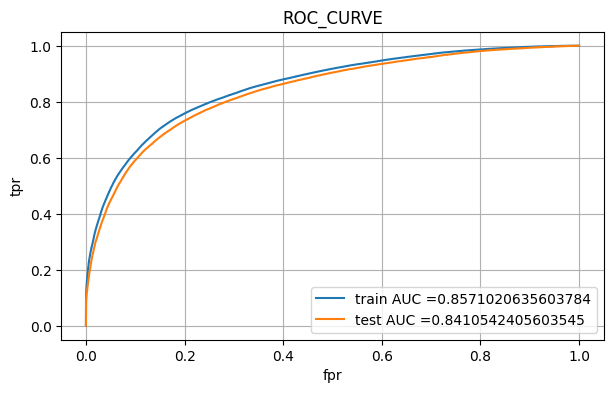

the maximum value of tpr*(1-fpr) 0.60657543455156 for threshold 0.368
the maximum value of tpr*(1-fpr) 0.5858516757029045 for threshold 0.382


<Figure size 640x480 with 0 Axes>

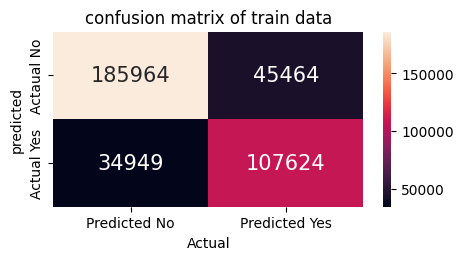

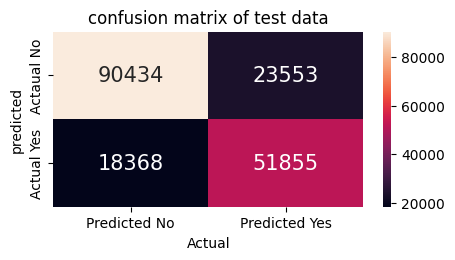

train_auc_score = 0.8571020635603784
validation_auc_score = 0.8410542405603545
--------------------------------------------------------------------------------------------------------------
logloss Train:-- 7.749653877874867
logloss Test:-- 8.202518830276205
--------------------------------------------------------------------------------------------------------------
F1 Train:-- 0.728022972255387
F1 Test:-- 0.7121423323330884


In [52]:
#https://www.kaggle.com/prashant111/lightgbm-classifier-in-python
import lightgbm as lgb

# clf = lgb.LGBMClassifier()
# prams={
#     'learning_rate':[0.1,0.15,0.2],
#      'n_estimators':[200,500,900],
#      'max_depth':[5,7,10]
# }

# random_cfl1=GridSearchCV(clf,prams,verbose=2,n_jobs=-1,)
# random_cfl1.fit(X_train,y_train)
# print(random_cfl1.best_params_)
# best_para=random_cfl1.best_params_

best_para={'n_estimators': 900, 'max_depth': 5, 'learning_rate': 0.15}

clf_lg = lgb.LGBMClassifier(n_estimators=best_para.get('n_estimators'),
                       max_depth=best_para.get('max_depth'),learning_rate=best_para.get('learning_rate'))
# clf=lgb.LGBMClassifier()
clf_lg.fit(X_train,y_train)

plot_roc_confusion_matrix_f1(clf_lg,X_train,y_train,X_cv,y_cv)

In [53]:
## saving the best model for future use
joblib.dump(clf_lg,'model.pkl')

['model.pkl']

### Modeling on Top 200 important featues

In [54]:
# # train model on important featues
# colum_name=np.take(X_train.columns,d1_important_inc) # getting featues imporance form previously trained random forest.
# X_train_imp=X_train[colum_name] 
# X_train_imp.shape
# X_cv_imp=X_cv[colum_name]
# X_cv_imp.shape

NameError: name 'd1_important_inc' is not defined

In [55]:
# Appling the best featues on lightgbm
best_para={'subsample': 0.3, 'n_estimators': 900, 'max_depth': 5, 'learning_rate': 0.15, 'colsample_bytree': 0.1}

clf = lgb.LGBMClassifier(subsample=best_para.get('subsample'),n_estimators=best_para.get('n_estimators'),
                       max_depth=best_para.get('max_depth'),learning_rate=best_para.get('learning_rate'),
                        colsample_bytree=best_para.get('colsample_bytree'))
clf.fit(X_train_imp,y_train)

plot_roc_confusion_matrix_f1(clf,X_train_imp,y_train,X_cv_imp,y_cv)


NameError: name 'X_train_imp' is not defined

## Behaviour of  best Model

Our main Aim is here to find why our model predicting a  False postive (Non fraud provider to Fraud) and  a False negative 
(Farud to Non fraud) label. 

To answer this question here we are checking the distribution of the featues which are False positive or False Negative by Positive labeled data (only fraud data) and Negative Labeled data(only non-fraud data) respectively to understand the behaviour of the model.

In [ ]:
# prediction based on best threshold.
y_predidict=clf_lg.predict_proba(X_cv)[:,1]
prediction_tr=predict_with_best_t(y_predidict,0.382)

conf_mat = pd.DataFrame(confusion_matrix(y_cv, prediction_tr))

sns.heatmap(conf_mat, annot = True, fmt= 'd',annot_kws={"size": 15}, xticklabels= ['Predicted No', 'Predicted Yes'], yticklabels= ['Actaual No','Actual Yes'])
plt.title('confusion matrix of test data')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

In [ ]:
# adding actual label and predicted label to dataframe
X_cv['Actual_y']=y_cv
X_cv['predicted_y']=prediction_tr
# sepating diffrent dataframe based on its predicted and actual label
False_negative_df=X_cv.loc[(X_cv['Actual_y'] ==1) & (X_cv['predicted_y']==0)]
false_positive_df=X_cv.loc[(X_cv['Actual_y'] ==0) & (X_cv['predicted_y']==1)]
positive_df=X_cv.loc[(X_cv['Actual_y'] ==1)]
negative_df=X_cv.loc[(X_cv['Actual_y'] ==0)]


In [ ]:
## 
print('False_positve',len(false_positive_df))
print('False_negative',len(False_negative_df))
print('Total_positive', len(positive_df))
print('Total_negative',len(negative_df))

In [ ]:
plt.figure(figsize=(16,6)) # hight and width of plot 
sns.set_style('whitegrid') # backgroud of plot 
sns.distplot(negative_df['DeductibleAmtPaid'],label='Negative')
sns.distplot(False_negative_df['DeductibleAmtPaid'],label='False_Negative')
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.legend()
plt.title('Distribution of DeductibleAmtPaid of False_nge VS Negative', fontsize=20)
plt.xlabel('DeductibleAmtPaid', size = 14)
plt.ylabel('Density', size = 14)
plt.show()

In [ ]:
plt.figure(figsize=(16,6)) # hight and width of plot 
sns.set_style('whitegrid') # backgroud of plot 
sns.distplot(positive_df['DeductibleAmtPaid'],label='positive')
sns.distplot(false_positive_df['DeductibleAmtPaid'],label='False_Positive')
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.legend()
plt.title('Distribution of DeductibleAmtPaid of false_pos VS Positive', fontsize=20)
plt.xlabel('DeductibleAmtPaid', size = 14)
plt.ylabel('Density', size = 14)
plt.show()

In [ ]:
plt.figure(figsize=(16,6)) # hight and width of plot 
sns.set_style('whitegrid') # backgroud of plot 
sns.distplot(negative_df['InscClaimAmtReimbursed'],label='Negative')
sns.distplot(False_negative_df['InscClaimAmtReimbursed'],label='False_Negative')
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.legend()
plt.title('Distribution of InscClaimAmtReimbursed of False_Neg VS Negative', fontsize=20)
plt.xlabel('InscClaimAmtReimbursed', size = 14)
plt.ylabel('Density', size = 14)
plt.show()

In [ ]:
plt.figure(figsize=(16,6)) # hight and width of plot 
sns.set_style('whitegrid') # backgroud of plot 
sns.distplot(positive_df['InscClaimAmtReimbursed'],label='positive')
sns.distplot(false_positive_df['InscClaimAmtReimbursed'],label='False_Positive')
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.legend()
plt.title('Distribution of InscClaimAmtReimbursed of false_pos VS Positive', fontsize=20)
plt.xlabel('InscClaimAmtReimbursed', size = 14)
plt.ylabel('Density', size = 14)
plt.show()

In [ ]:
plt.figure(figsize=(16,6)) # hight and width of plot 
sns.set_style('whitegrid') # backgroud of plot 
sns.distplot(negative_df['IPAnnualReimbursementAmt'],label='Negative')
sns.distplot(False_negative_df['IPAnnualReimbursementAmt'],label='False_Negative')
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.legend()
plt.title('Distribution of IPAnnualReimbursementAmt of False_Neg VS Negative', fontsize=20)
plt.xlabel('IPAnnualReimbursementAmt', size = 14)
plt.ylabel('Density', size = 14)
plt.show()

In [ ]:
plt.figure(figsize=(16,6)) # hight and width of plot 
sns.set_style('whitegrid') # backgroud of plot 
sns.distplot(positive_df['IPAnnualReimbursementAmt'],label='positive')
sns.distplot(false_positive_df['IPAnnualReimbursementAmt'],label='False_Positive')
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.legend()
plt.title('Distribution of IPAnnualReimbursementAmt of false_pos VS Positive', fontsize=20)
plt.xlabel('IPAnnualReimbursementAmt', size = 14)
plt.ylabel('Density', size = 14)
plt.show()

In [ ]:
plt.figure(figsize=(16,6)) # hight and width of plot 
sns.set_style('whitegrid') # backgroud of plot 
sns.distplot(negative_df['IPAnnualDeductibleAmt'],label='Negative')
sns.distplot(False_negative_df['IPAnnualDeductibleAmt'],label='False_Negative')
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.legend()
plt.title('Distribution of IPAnnualDeductibleAmt of False_Neg VS Negative', fontsize=20)
plt.xlabel('IPAnnualDeductibleAmt', size = 14)
plt.ylabel('Density', size = 14)
plt.show()

In [ ]:
plt.figure(figsize=(16,6)) # hight and width of plot 
sns.set_style('whitegrid') # backgroud of plot 
sns.distplot(positive_df['IPAnnualDeductibleAmt'],label='positive')
sns.distplot(false_positive_df['IPAnnualDeductibleAmt'],label='False_Positive')
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.legend()
plt.title('Distribution of IPAnnualDeductibleAmt of false_pos VS Positive', fontsize=20)
plt.xlabel('IPAnnualDeductibleAmt', size = 14)
plt.ylabel('Density', size = 14)
plt.show()

In [ ]:
plt.figure(figsize=(16,6)) # hight and width of plot 
sns.set_style('whitegrid') # backgroud of plot 
sns.distplot(negative_df['Total_physican_attended'],label='Negative')
sns.distplot(False_negative_df['Total_physican_attended'],label='False_Negative')
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.legend()
plt.title('Distribution of Total_physican_attended of False_Neg VS Negative', fontsize=20)
plt.xlabel('Total_physican_attended', size = 14)
plt.ylabel('Density', size = 14)
plt.show()

In [ ]:
plt.figure(figsize=(16,6)) # hight and width of plot 
sns.set_style('whitegrid') # backgroud of plot 
sns.distplot(positive_df['Total_physican_attended'],label='positive')
sns.distplot(false_positive_df['Total_physican_attended'],label='False_Positive')
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.legend()
plt.title('Distribution of Total_physican_attended of false_pos VS Positive', fontsize=20)
plt.xlabel('Total_physican_attended', size = 14)
plt.ylabel('Density', size = 14)
plt.show()

In [ ]:
plt.figure(figsize=(16,6)) # hight and width of plot 
sns.set_style('whitegrid') # backgroud of plot 
sns.distplot(negative_df['Total_ClmProcedureCode'],label='Negative')
sns.distplot(False_negative_df['Total_ClmProcedureCode'],label='False_Negative')
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.legend()
plt.title('Distribution of Total_ClmProcedureCode of False_Neg VS Negative', fontsize=20)
plt.xlabel('Total_ClmProcedureCode', size = 14)
plt.ylabel('Density', size = 14)
plt.show()

In [ ]:
plt.figure(figsize=(16,6)) # hight and width of plot 
sns.set_style('whitegrid') # backgroud of plot 
sns.distplot(positive_df['Total_ClmProcedureCode'],label='positive')
sns.distplot(false_positive_df['Total_ClmProcedureCode'],label='False_Positive')
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.legend()
plt.title('Distribution of Total_ClmProcedureCode of false_pos VS Positive', fontsize=20)
plt.xlabel('Total_ClmProcedureCode', size = 14)
plt.ylabel('Density', size = 14)
plt.show()

#### Observations
From the above analysis we can say that the distribution of the false negative data and negative data is very similar.same for the false positve.
therefor our model is predicting some of the same diributed data points incorrect.

## Deployment on Heroku



1. https://healthcare-fraud-api.herokuapp.com/index 